# Generalization, Overfitting, Regularization


Generalization, Overfitting, Regularization

	• Underfitting vs Overfitting (Graphical + Mathematical)
	• Bias-Variance Tradeoff (Intro)
	• L1 and L2 Regularization: Norms, Sparsity, and Penalization
	• Ridge Regression (L2)
	• Lasso Regression (L1) and Feature Selection
	• Cross-Validation & Model Selection
	• Python: Regularized Linear/Logistic Regression



/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


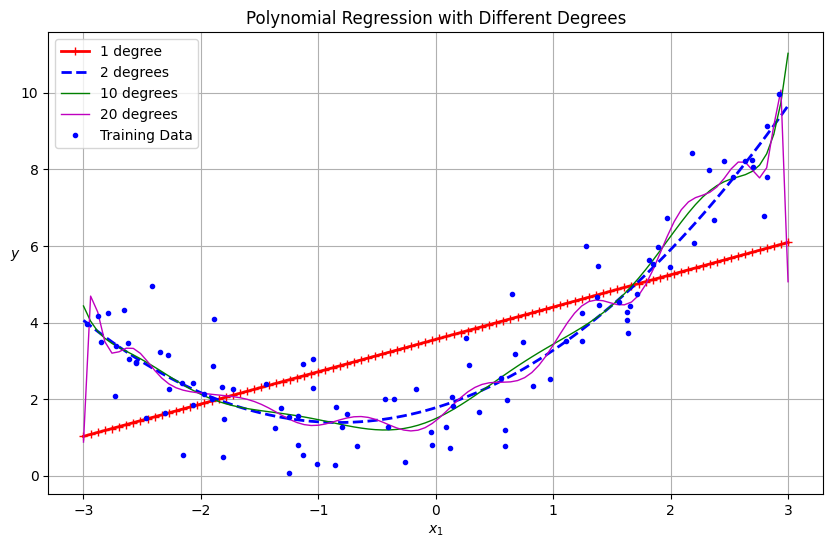

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data for demonstration
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Create data for plotting the predictions
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)

plt.figure(figsize=(10, 6))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 10), ("m", 1, 20)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3, label="Training Data")
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.title("Polynomial Regression with Different Degrees")
plt.grid(True)
plt.show()

/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_


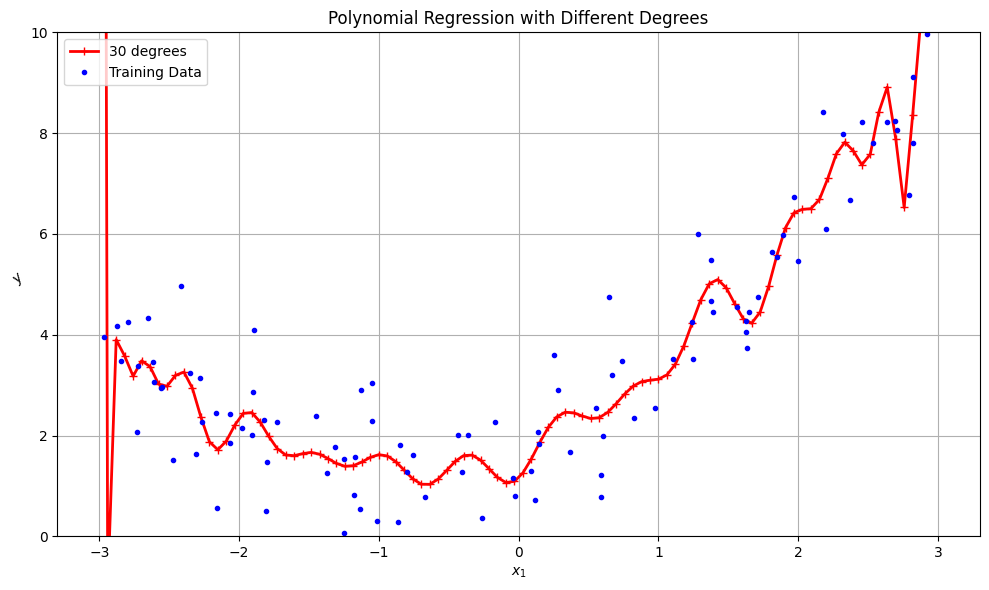

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data for demonstration
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Create data for plotting the predictions
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)

plt.figure(figsize=(10, 6))

for style, width, degree in (("r-+", 2, 30),):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3, label="Training Data")
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=45)
plt.title("Polynomial Regression with Different Degrees")
plt.grid(True)

# Set only the y-axis limits to 0-10
plt.ylim(0, 10)

plt.tight_layout()
plt.show()

Generalization, Overfitting, and Regularization

1. Underfitting vs Overfitting

Conceptual Overview
	•	Underfitting occurs when the model is too simple to capture the underlying trend.
	•	Overfitting happens when the model is too complex and captures noise in the training data.
	•	Good Generalization balances complexity and accuracy on unseen data.

Graphical Representation

/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


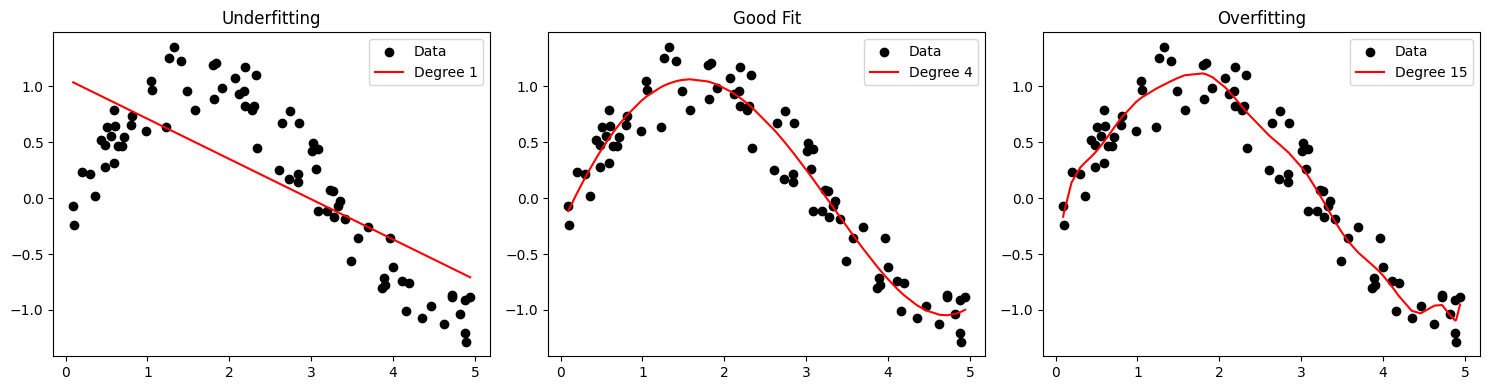

In [3]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Models of different complexity
degrees = [1, 4, 15]
plt.figure(figsize=(15, 4))

for i, d in enumerate(degrees):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)

    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='black', label='Data')
    plt.plot(X, y_pred, color='red', label=f'Degree {d}')
    plt.title(['Underfitting', 'Good Fit', 'Overfitting'][i])
    plt.legend()

plt.tight_layout()
plt.show()




⸻

2. Mathematical Formulation

Let training error be:

$$
\text{MSE}{train} = \frac{1}{n} \sum{i=1}^n (y_i - \hat{y}_i)^2
$$
	•	Underfitting: High training and validation error.
	•	Overfitting: Low training error, high validation error.
	•	Generalization: Low validation error, good performance on unseen data.









# Bias-Variance Tradeoff: A Mathematical Understanding

## 1. Introduction

The bias-variance tradeoff is a fundamental concept in machine learning that explains the relationship between a model's complexity, its error on training data, and its ability to generalize to new data. Understanding this tradeoff helps us build models that balance underfitting and overfitting.

## 2. Mathematical Decomposition of Error

For any supervised learning problem, we can decompose the expected prediction error into three components:

$$\mathbb{E}[(y - \hat{f}(x))^2] = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

Where:
- $y$ is the true target value
- $\hat{f}(x)$ is our model's prediction
- $\mathbb{E}$ represents the expected value

## 3. Understanding Each Component

### 3.1. Bias

**Bias** measures how far off our predictions are from the true values on average.

$$\text{Bias}[\hat{f}(x)] = \mathbb{E}[\hat{f}(x)] - f(x)$$

Where $f(x)$ is the true underlying function we're trying to approximate.

**High bias** indicates that our model is making **systematic errors** - it's consistently missing the target. This typically happens when the model is too simple to capture the underlying pattern in the data (underfitting).

### 3.2. Variance

**Variance** measures how much our model's prediction would fluctuate if we trained it on different training datasets.

$$\text{Variance}[\hat{f}(x)] = \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2]$$

**High variance** indicates that our model is highly sensitive to the specific data it was trained on, meaning it's likely capturing noise rather than the underlying pattern (overfitting).

### 3.3. Irreducible Error

$$\text{Irreducible Error} = \sigma^2 = \mathbb{E}[(y - f(x))^2]$$

This represents noise in the true relationship that cannot be eliminated by any model.

## 4. The Tradeoff

The key insight is that as model complexity increases:
- Bias tends to decrease (the model can represent more complex patterns)
- Variance tends to increase (the model becomes more sensitive to training data)

This creates a tradeoff where the total error (which is the sum of squared bias, variance, and irreducible error) forms a U-shaped curve when plotted against model complexity.

## 5. Mathematical Formulation for MSE

For a specific input point $x_0$, the expected mean squared error of a model $\hat{f}$ can be mathematically decomposed as:

$$\mathbb{E}[(y_0 - \hat{f}(x_0))^2] = (f(x_0) - \mathbb{E}[\hat{f}(x_0)])^2 + \mathbb{E}[(\hat{f}(x_0) - \mathbb{E}[\hat{f}(x_0)])^2] + \sigma^2$$

Which simplifies to:

$$\mathbb{E}[(y_0 - \hat{f}(x_0))^2] = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

## 6. Polynomial Regression Example

For polynomial regression of degree $d$, we have:

$$\hat{f}_d(x) = \sum_{j=0}^{d} \beta_j x^j$$

As $d$ increases:
- Bias decreases: Higher degree polynomials can better approximate the true function
- Variance increases: The model becomes more sensitive to the specific noise patterns in the training data

## 7. Practical Implications

The total expected test MSE is:

$$\text{Expected Test MSE} = \text{Bias}^2 + \text{Variance} + \sigma^2$$

While the training MSE typically continues to decrease as model complexity increases, the test MSE will eventually start increasing due to the variance term growing faster than the bias term decreases.

This is why:
- **Simple models** (low complexity): High bias, low variance → Underfitting
- **Complex models** (high complexity): Low bias, high variance → Overfitting
- **Optimal models**: The right balance between bias and variance → Best generalization

## 8. Mathematical Visualization

If we plot the error terms against model complexity, we get:

- $\text{Bias}^2 \approx \frac{C_1}{\text{complexity}}$ (decreases with complexity)
- $\text{Variance} \approx C_2 \cdot \text{complexity}$ (increases with complexity)
- $\text{Total Error} = \text{Bias}^2 + \text{Variance} + \sigma^2$ (U-shaped)

Where $C_1$ and $C_2$ are constants.

## 9. Regularization Perspective

Regularization techniques like L1 and L2 can be viewed as ways to manage this tradeoff. The regularized loss function is:

$$L_{regularized} = L_{empirical} + \lambda \cdot \text{complexity}$$

Where $\lambda$ controls the tradeoff between fitting the training data (reducing bias) and keeping the model simple (reducing variance).

## 10. Key Takeaways

1. **Total error = Bias² + Variance + Irreducible Error**
2. As model complexity increases, bias decreases while variance increases
3. The optimal model complexity minimizes the sum of squared bias and variance
4. Training error consistently decreases with model complexity
5. Test error forms a U-shaped curve due to the bias-variance tradeoff
6. Regularization helps manage this tradeoff by penalizing excessive complexity



/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @

/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @

/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @

/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @

/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @

/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_.T + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:282: RuntimeWarning: overflow encountered in matmul
  return X @

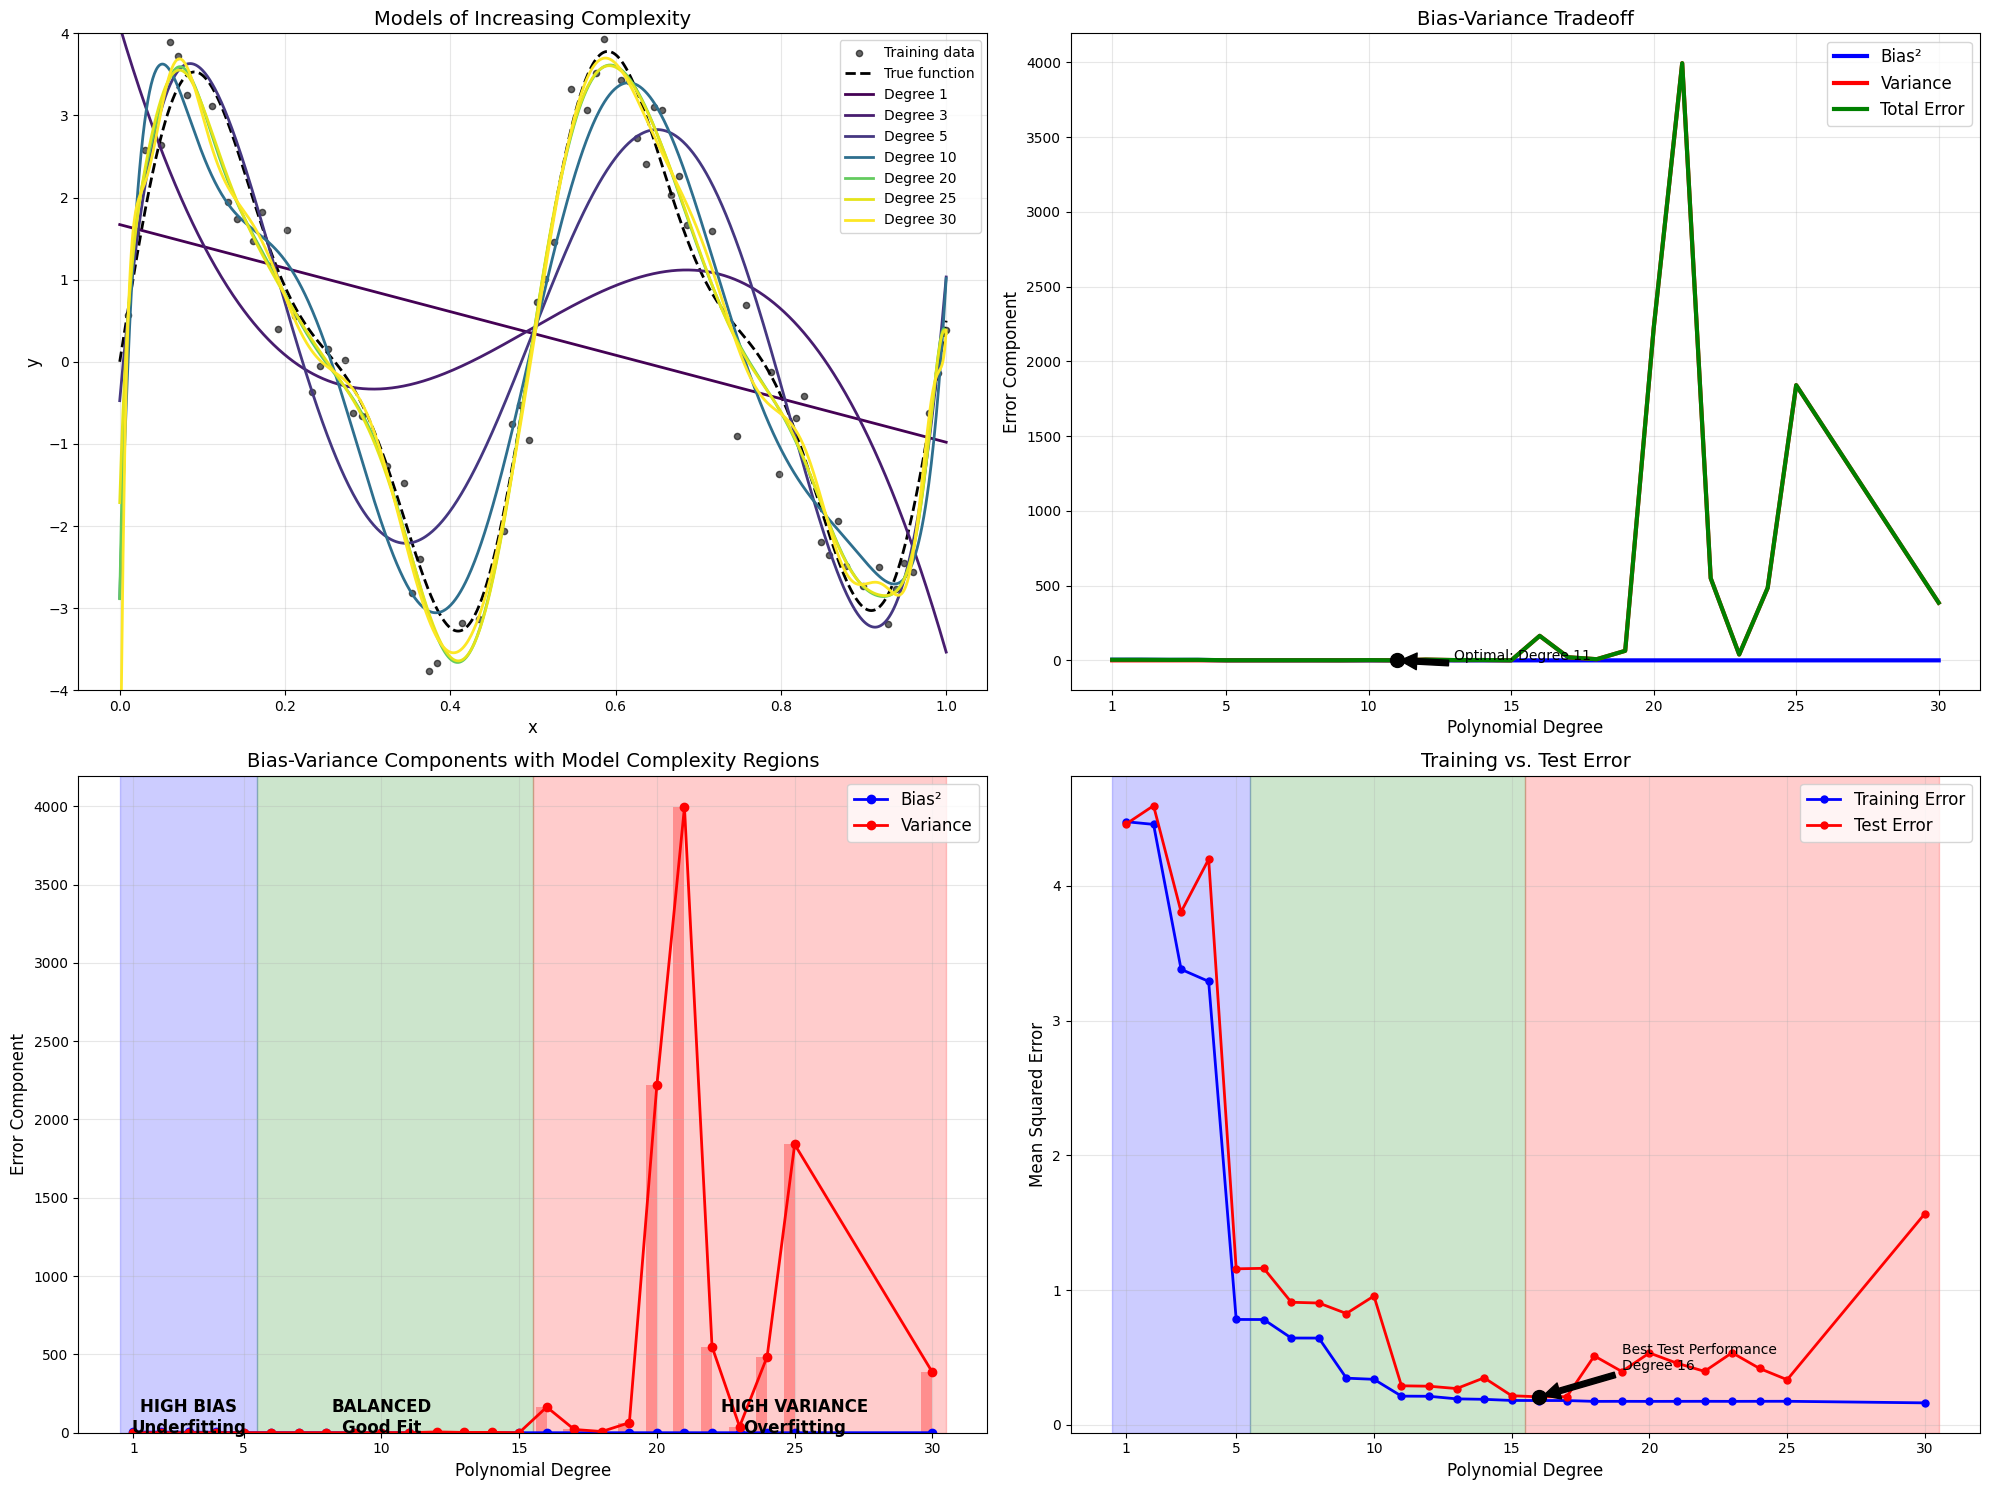

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Generate a more challenging dataset with a complex true function
np.random.seed(42)
n_samples = 100

# Create a more complex underlying function with multiple frequencies
def true_func(x):
    return 3*np.sin(4 * np.pi * x) + np.sin(8 * np.pi * x) + 0.5*x

# Generate data points over a limited range
x = np.linspace(0, 1, n_samples)[:, np.newaxis]
y_true = true_func(x)
y = y_true + 0.5 * np.random.randn(n_samples, 1)  # More noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Range of polynomials for more granular analysis - Extended to include 25 and 30
degrees = list(range(1, 25)) + [25, 30]  # From 1 to 24, plus 25 and 30
colors = plt.cm.viridis(np.linspace(0, 1, len(degrees)))

# Full range for visualization
x_plot = np.linspace(0, 1, 1000)[:, np.newaxis]
y_plot_true = true_func(x_plot)

# For storing results
train_errors = []
test_errors = []
biases = []
variances = []

# Create figure
plt.figure(figsize=(20, 15))

# 1. Plot showing model evolution with increasing complexity
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color='black', s=20, alpha=0.6, label='Training data')
plt.plot(x_plot, y_plot_true, 'k--', linewidth=2, label='True function')

# Show only selected models for clarity - including 25 and 30
selected_degrees = [1, 3, 5, 10, 20, 25, 30]
for degree in selected_degrees:
    idx = min(degree - 1, len(colors) - 1)  # Ensure index is within bounds
    poly_model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=True),
        LinearRegression()
    )
    poly_model.fit(X_train, y_train)
    y_plot_pred = poly_model.predict(x_plot)

    plt.plot(x_plot, y_plot_pred,
             label=f'Degree {degree}',
             linewidth=2,
             color=colors[idx])

plt.title('Models of Increasing Complexity', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(-4, 4)

# Bootstrap for variance estimation
n_bootstraps = 30

# Calculate errors for all degrees
for i, degree in enumerate(degrees):
    poly_model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=True),
        LinearRegression()
    )

    # Fit on training data
    poly_model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = poly_model.predict(X_train)
    y_test_pred = poly_model.predict(X_test)
    y_plot_pred = poly_model.predict(x_plot)

    # Calculate errors
    train_err = mean_squared_error(y_train, y_train_pred)
    test_err = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_err)
    test_errors.append(test_err)

    # Calculate bias (squared difference between true and expected prediction)
    bias = np.mean((y_plot_true - y_plot_pred)**2)
    biases.append(bias)

    # Bootstrap to estimate variance
    bootstrap_preds = np.zeros((n_bootstraps, len(x_plot)))

    for b in range(n_bootstraps):
        # Create bootstrap sample
        boot_indices = np.random.choice(len(X_train), len(X_train), replace=True)
        X_boot, y_boot = X_train[boot_indices], y_train[boot_indices]

        # Train model on bootstrap sample
        boot_model = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=True),
            LinearRegression()
        )
        boot_model.fit(X_boot, y_boot)

        # Predict
        bootstrap_preds[b] = boot_model.predict(x_plot).ravel()

    # Calculate variance across bootstrap models
    pred_variance = np.mean(np.var(bootstrap_preds, axis=0))
    variances.append(pred_variance)

# 2. Bias-Variance tradeoff as functions of model complexity
plt.subplot(2, 2, 2)
plt.plot(degrees, biases, 'b-', linewidth=3, label='Bias²')
plt.plot(degrees, variances, 'r-', linewidth=3, label='Variance')
total_error = [b + v for b, v in zip(biases, variances)]
plt.plot(degrees, total_error, 'g-', linewidth=3, label='Total Error')

# Add dot to show minimum total error
min_idx = np.argmin(total_error)
optimal_degree = degrees[min_idx]
plt.plot(optimal_degree, total_error[min_idx], 'ko', markersize=10)
plt.annotate(f'Optimal: Degree {optimal_degree}',
             xy=(optimal_degree, total_error[min_idx]),
             xytext=(optimal_degree+2, total_error[min_idx]+0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Bias-Variance Tradeoff', fontsize=14)
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Error Component', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks([1, 5, 10, 15, 20, 25, 30])  # Update tick marks to include 25 and 30

# 3. Heatmap visualization of bias and variance
plt.subplot(2, 2, 3)
plt.plot(degrees, biases, 'bo-', linewidth=2, label='Bias²')
plt.plot(degrees, variances, 'ro-', linewidth=2, label='Variance')
plt.bar(degrees, biases, alpha=0.3, color='blue', width=0.4, align='edge')
plt.bar(degrees, variances, alpha=0.3, color='red', width=-0.4, align='edge')

# Add regions - update to include degree 25 and 30
high_bias_region = [d for d in degrees if d <= 5]
balanced_region = [d for d in degrees if 5 < d <= 15]
high_variance_region = [d for d in degrees if d > 15]

plt.axvspan(min(high_bias_region)-0.5, max(high_bias_region)+0.5, alpha=0.2, color='blue')
plt.axvspan(min(balanced_region)-0.5, max(balanced_region)+0.5, alpha=0.2, color='green')
plt.axvspan(min(high_variance_region)-0.5, max(high_variance_region)+0.5, alpha=0.2, color='red')

# Add region labels
plt.text(3, 1.0, "HIGH BIAS\nUnderfitting", ha='center', fontsize=12, fontweight='bold')
plt.text(10, 0.8, "BALANCED\nGood Fit", ha='center', fontsize=12, fontweight='bold')
plt.text(25, 1.0, "HIGH VARIANCE\nOverfitting", ha='center', fontsize=12, fontweight='bold')  # Moved to center of expanded region

plt.title('Bias-Variance Components with Model Complexity Regions', fontsize=14)
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Error Component', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks([1, 5, 10, 15, 20, 25, 30])  # Update tick marks

# 4. Training vs Test error
plt.subplot(2, 2, 4)
plt.plot(degrees, train_errors, 'b-o', linewidth=2, markersize=5, label='Training Error')
plt.plot(degrees, test_errors, 'r-o', linewidth=2, markersize=5, label='Test Error')

# Find minimum test error
min_test_idx = np.argmin(test_errors)
min_test_degree = degrees[min_test_idx]
min_test_error = test_errors[min_test_idx]

plt.plot(min_test_degree, min_test_error, 'ko', markersize=10)
plt.annotate(f'Best Test Performance\nDegree {min_test_degree}',
             xy=(min_test_degree, min_test_error),
             xytext=(min_test_degree+3, min_test_error+0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add the same region shading
plt.axvspan(min(high_bias_region)-0.5, max(high_bias_region)+0.5, alpha=0.2, color='blue')
plt.axvspan(min(balanced_region)-0.5, max(balanced_region)+0.5, alpha=0.2, color='green')
plt.axvspan(min(high_variance_region)-0.5, max(high_variance_region)+0.5, alpha=0.2, color='red')

plt.title('Training vs. Test Error', fontsize=14)
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Mean Squared Error', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks([1, 5, 10, 15, 20, 25, 30])  # Update tick marks

plt.tight_layout()
plt.show()


Polynomial Degree 1:
  Training MSE: 1.5506
  Test MSE:     1.7740
  Bias²:        1.4951
  Variance:     0.0374
  Bias² + Var:  1.5325

Polynomial Degree 3:
  Training MSE: 0.2401
  Test MSE:     0.1528
  Bias²:        0.0298
  Variance:     0.0147
  Bias² + Var:  0.0445

Polynomial Degree 10:
  Training MSE: 0.2106
  Test MSE:     0.1534
  Bias²:        0.0253
  Variance:     0.1272
  Bias² + Var:  0.1525


--- PRACTICAL DIAGNOSIS WITH LEARNING CURVES ---


/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Volumes/MacSSD/Machine Learning for Business/.venv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ +

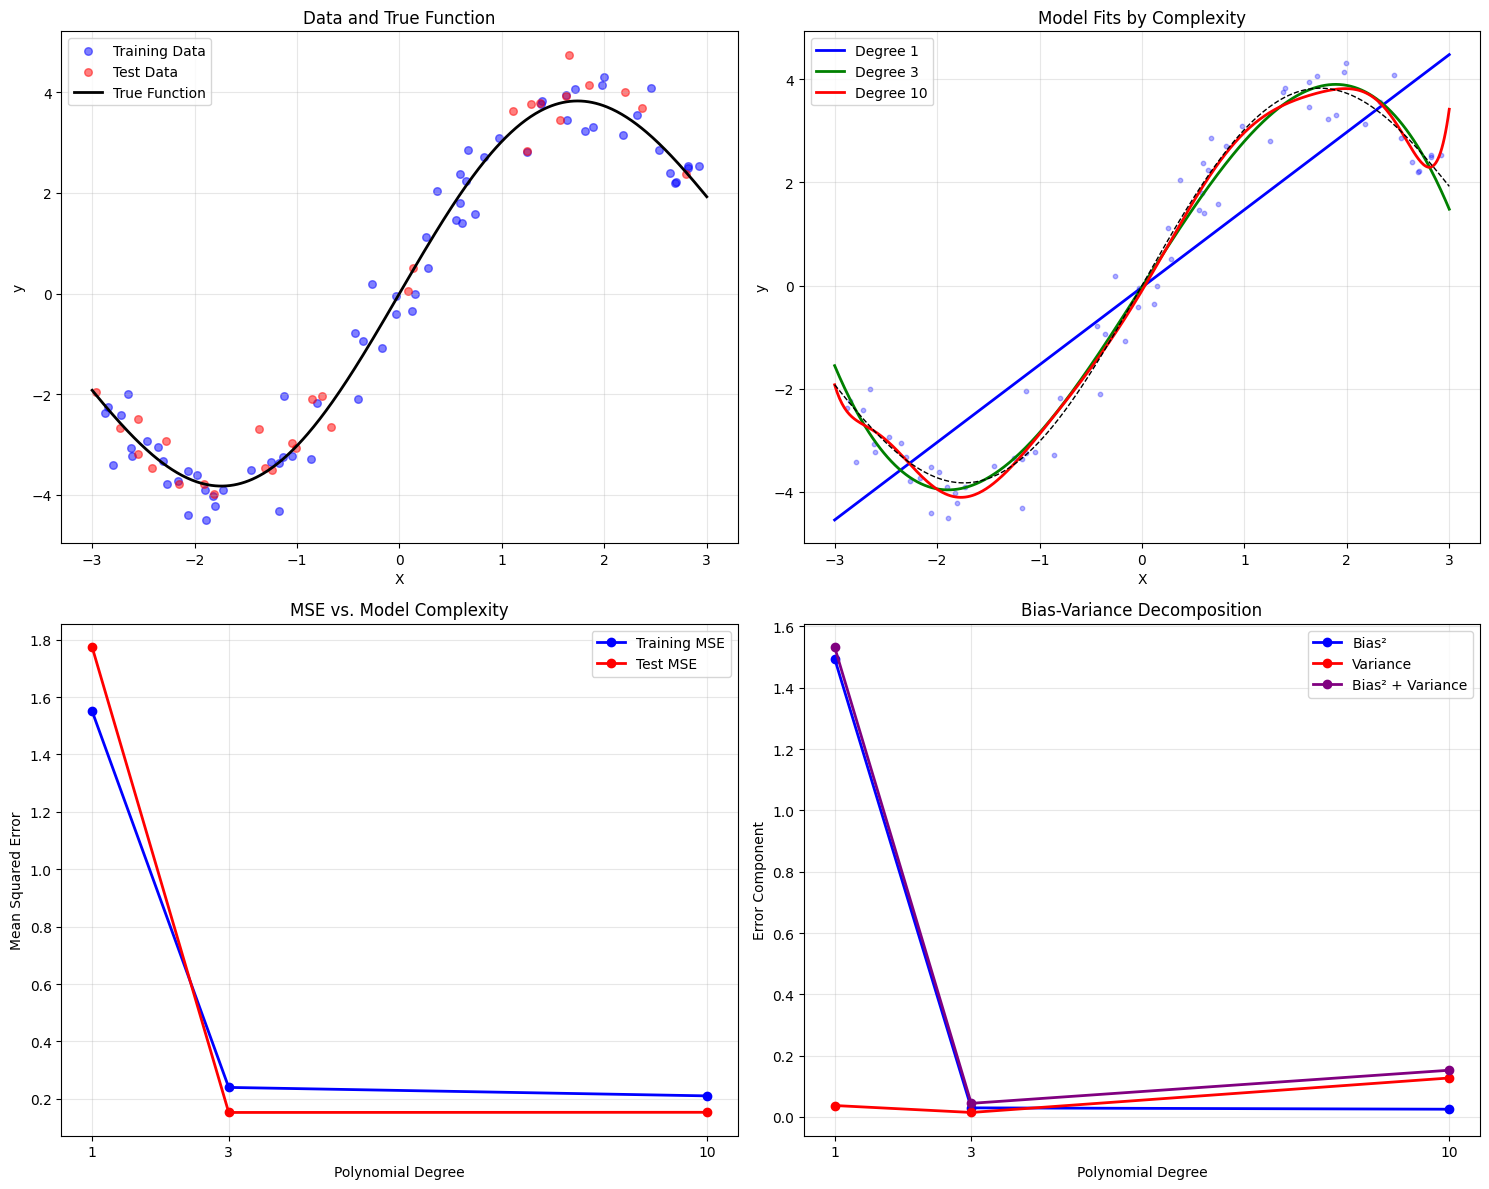

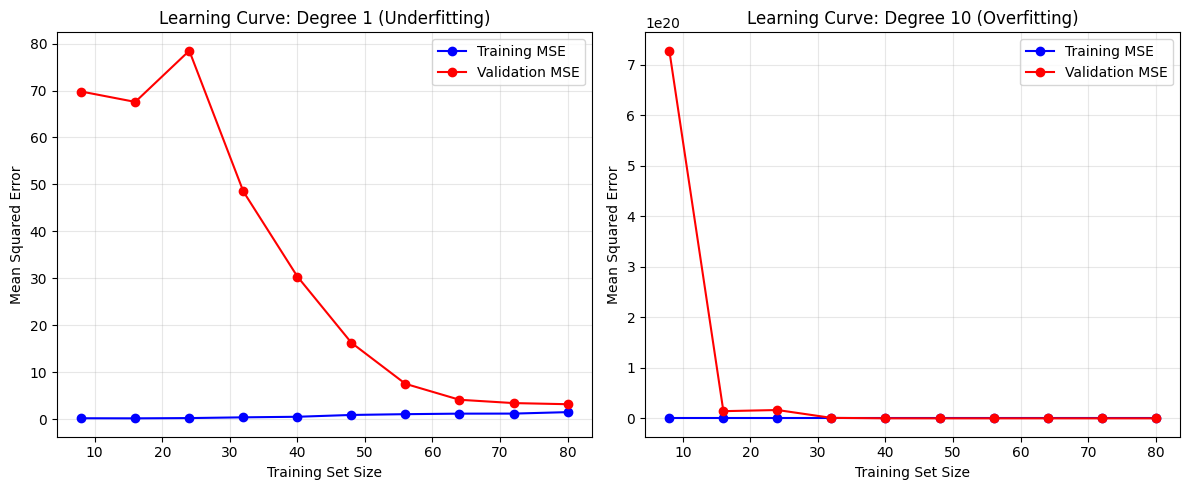


DIAGNOSTIC SUMMARY:
Model A (Degree 1 - Underfitting):
  Training MSE: 1.4709
  Validation MSE: 3.1584
  Gap: 1.6876
Model B (Degree 10 - Overfitting):
  Training MSE: 0.1858
  Validation MSE: 6188.8096
  Gap: 6188.6238

INTERPRETATION:
- Model A: High bias (underfitting) - Small MSE gap, high errors overall.
- Model B: High variance (overfitting) - Large MSE gap, low training error.

RECOMMENDATIONS:
- For Model A: Increase complexity (e.g., higher degree, more features).
- For Model B: Reduce complexity, add regularization, or collect more data.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a non-linear true function
def true_function(x):
    return 3 * np.sin(x) + 0.5 * x

# Create dataset
n_samples = 100
X = np.sort(6 * np.random.rand(n_samples) - 3)
y_true = true_function(X)
y = y_true + 0.5 * np.random.randn(n_samples)  # Add noise
X = X.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model complexities (polynomial degrees)
model_complexities = [1, 3, 10]

# Function to compute bias and variance via bootstrapping
def compute_bias_variance(model_func, X_train, y_train, X_eval, true_func, n_bootstrap=50):
    y_pred_boot = np.zeros((n_bootstrap, len(X_eval)))
    for i in range(n_bootstrap):
        idx = np.random.choice(len(X_train), len(X_train), replace=True)
        model = model_func()
        model.fit(X_train[idx], y_train[idx])
        y_pred_boot[i] = model.predict(X_eval).ravel()

    y_pred_mean = np.mean(y_pred_boot, axis=0)
    y_true_eval = true_func(X_eval.ravel())
    bias_squared = np.mean((y_pred_mean - y_true_eval) ** 2)
    variance = np.mean(np.var(y_pred_boot, axis=0))
    return bias_squared, variance

# Function to create polynomial regression model
def create_poly_model(degree):
    return make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

# Initialize results storage
train_mse, test_mse, bias_values, variance_values = [], [], [], []
X_plot = np.linspace(-3, 3, 500).reshape(-1, 1)

# Set up plot
plt.figure(figsize=(15, 12))

# Plot 1: Data and True Function
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, c='blue', s=30, alpha=0.5, label='Training Data')
plt.scatter(X_test, y_test, c='red', s=30, alpha=0.5, label='Test Data')
plt.plot(X_plot, true_function(X_plot.ravel()), 'k-', lw=2, label='True Function')
plt.title('Data and True Function')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# Train models and collect metrics
colors = ['blue', 'green', 'red']
for i, degree in enumerate(model_complexities):
    model = create_poly_model(degree)
    model.fit(X_train, y_train)

    # Compute MSE
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

    # Compute bias and variance
    bias_squared, variance = compute_bias_variance(
        lambda: create_poly_model(degree), X_train, y_train, X_plot, true_function
    )
    bias_values.append(bias_squared)
    variance_values.append(variance)

    # Plot 2: Model Fits
    plt.subplot(2, 2, 2)
    y_pred_plot = model.predict(X_plot)
    plt.plot(X_plot, y_pred_plot, c=colors[i], lw=2, label=f'Degree {degree}')

    # Print results
    print(f"Polynomial Degree {degree}:")
    print(f"  Training MSE: {train_mse[-1]:.4f}")
    print(f"  Test MSE:     {test_mse[-1]:.4f}")
    print(f"  Bias²:        {bias_squared:.4f}")
    print(f"  Variance:     {variance:.4f}")
    print(f"  Bias² + Var:  {bias_squared + variance:.4f}\n")

# Finalize Plot 2
plt.subplot(2, 2, 2)
plt.scatter(X_train, y_train, c='blue', s=10, alpha=0.3)
plt.plot(X_plot, true_function(X_plot.ravel()), 'k--', lw=1)
plt.title('Model Fits by Complexity')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: MSE vs. Complexity
plt.subplot(2, 2, 3)
plt.plot(model_complexities, train_mse, 'o-', c='blue', lw=2, label='Training MSE')
plt.plot(model_complexities, test_mse, 'o-', c='red', lw=2, label='Test MSE')
plt.xticks(model_complexities)
plt.title('MSE vs. Model Complexity')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Bias-Variance Decomposition
plt.subplot(2, 2, 4)
plt.plot(model_complexities, bias_values, 'o-', c='blue', lw=2, label='Bias²')
plt.plot(model_complexities, variance_values, 'o-', c='red', lw=2, label='Variance')
plt.plot(model_complexities, [b + v for b, v in zip(bias_values, variance_values)],
         'o-', c='purple', lw=2, label='Bias² + Variance')
plt.xticks(model_complexities)
plt.title('Bias-Variance Decomposition')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error Component')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()

# Practical Diagnostics with Learning Curves
print("\n--- PRACTICAL DIAGNOSIS WITH LEARNING CURVES ---")
def plot_learning_curve(degree, ax, title):
    model = create_poly_model(degree)
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_mse_mean, 'o-', c='blue', label='Training MSE')
    ax.plot(train_sizes, test_mse_mean, 'o-', c='red', label='Validation MSE')
    ax.set_title(title)
    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('Mean Squared Error')
    ax.legend()
    ax.grid(True, alpha=0.3)
    return train_mse_mean[-1], test_mse_mean[-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
underfit_train_mse, underfit_test_mse = plot_learning_curve(1, ax1, 'Learning Curve: Degree 1 (Underfitting)')
overfit_train_mse, overfit_test_mse = plot_learning_curve(10, ax2, 'Learning Curve: Degree 10 (Overfitting)')
plt.tight_layout()
plt.show()

# Diagnostic Summary
print("\nDIAGNOSTIC SUMMARY:")
print("Model A (Degree 1 - Underfitting):")
print(f"  Training MSE: {underfit_train_mse:.4f}")
print(f"  Validation MSE: {underfit_test_mse:.4f}")
print(f"  Gap: {underfit_test_mse - underfit_train_mse:.4f}")
print("Model B (Degree 10 - Overfitting):")
print(f"  Training MSE: {overfit_train_mse:.4f}")
print(f"  Validation MSE: {overfit_test_mse:.4f}")
print(f"  Gap: {overfit_test_mse - overfit_train_mse:.4f}")
print("\nINTERPRETATION:")
print("- Model A: High bias (underfitting) - Small MSE gap, high errors overall.")
print("- Model B: High variance (overfitting) - Large MSE gap, low training error.")
print("\nRECOMMENDATIONS:")
print("- For Model A: Increase complexity (e.g., higher degree, more features).")
print("- For Model B: Reduce complexity, add regularization, or collect more data.")

# Regularization in Linear Regression

Regularization prevents overfitting in machine learning models by adding a penalty term to the loss function, discouraging overly complex models and improving generalization. In linear regression, regularization modifies the least squares objective by penalizing large model weights. The general regularized objective is:

$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - f_\theta(x^{(i)}))^2 + \lambda \cdot R(\theta) $$

- **Loss Function**: $\frac{1}{n} \sum_{i=1}^n (y^{(i)} - f_\theta(x^{(i)}))^2$ is the mean squared error, measuring model fit.
- **Regularizer** $R(\theta)$: Penalizes model complexity, typically based on weight size.
- **Hyperparameter** $\lambda > 0$: Controls regularization strength. Larger $\lambda$ values favor simpler models.

The two primary regularization methods for linear regression are **L1 regularization** (Lasso) and **L2 regularization** (Ridge). This chapter explains both, their differences, and their applications.

---

## L2 Regularization: Ridge Regression

### Definition
Ridge regression adds an **L2 norm** penalty to the least squares objective, encouraging smaller weights to reduce complexity. The objective is:

$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - \theta^\top x^{(i)})^2 + \lambda \cdot \|\theta\|_2^2 $$

Where:
- $\|\theta\|_2^2 = \sum_{j=1}^d \theta_j^2$ is the squared L2 norm of weights $\theta$.
- The bias term $\theta_0$ is typically excluded from the penalty.

### Key Characteristics
- **Weight Shrinkage**: The L2 penalty shrinks weights toward zero but rarely sets them to zero, yielding smaller, stable coefficients.
- **Effect on Features**: Retains all features, reducing their influence, making Ridge ideal when all features are potentially relevant.
- **Optimization**:
  - **Closed-Form Solution**: $\theta^* = (X^\top X + \lambda I)^{-1} X^\top y$, where $\lambda I$ ensures invertibility.
  - **Gradient Descent**: Suitable for large datasets, with variants like Stochastic Average Gradient (SAG) or Conjugate Gradient (CG).
- **Hyperparameter** $\lambda$: Balances data fit and weight shrinkage. Larger $\lambda$ increases shrinkage.

### Why Use Ridge?
Ridge is effective when:
- Features are correlated (multicollinearity), as it stabilizes solutions.
- You want to retain all features but reduce their impact to avoid overfitting.

---

## L1 Regularization: Lasso Regression

### Definition
Lasso (Least Absolute Shrinkage and Selection Operator) uses an **L1 norm** penalty, promoting sparsity by setting some weights to zero. The objective is:

$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - \theta^\top x^{(i)})^2 + \lambda \cdot \|\theta\|_1 $$

Where:
- $\|\theta\|_1 = \sum_{j=1}^d |\theta_j|$ is the L1 norm of weights $\theta$.
- The bias term $\theta_0$ is typically excluded.

### Key Characteristics
- **Sparsity**: The L1 penalty drives many weights to zero, performing feature selection by ignoring irrelevant features.
- **Effect on Features**: Ideal when only a subset of features is important, as it selects a sparse subset.
- **Optimization**:
  - No closed-form solution due to the non-differentiable L1 norm.
  - Uses iterative methods like **coordinate descent** or proximal gradient methods.
- **Hyperparameter** $\lambda$: Controls sparsity. Larger $\lambda$ sets more weights to zero.

### Why Use Lasso?
Lasso is effective when:
- You need automatic feature selection to simplify the model.
- The dataset has many features, but few are relevant.

---

## Comparing L1 and L2 Regularization

| Property                | L1 Regularization (Lasso)                     | L2 Regularization (Ridge)                     |
|-------------------------|----------------------------------------------|----------------------------------------------|
| **Penalty Term**        | $\|\theta\|_1 = \sum_{j=1}^d |\theta_j|$     | $\|\theta\|_2^2 = \sum_{j=1}^d \theta_j^2$   |
| **Effect on Weights**   | Sets some weights to zero (sparse)           | Shrinks weights toward zero (non-sparse)     |
| **Feature Selection**   | Yes, automatic                               | No, retains all features                     |
| **Solution Stability**  | Less stable with correlated features         | More stable with correlated features         |
| **Optimization**        | Coordinate descent, no closed form           | Closed form or gradient descent              |
| **Use Case**            | Sparse models, feature selection             | Multicollinearity, stable coefficients       |

### Geometric Intuition
- **L2 (Ridge)**: The L2 penalty forms a circular constraint in weight space, encouraging small, non-zero weights.
- **L1 (Lasso)**: The L1 penalty forms a diamond-shaped constraint, with corners at axes, encouraging zero weights.

---

## Application to Polynomial Regression

In polynomial regression, where features are polynomial terms (e.g., $\phi(x) = [1, x, x^2, \dots, x^d]$), regularization prevents overfitting to high-degree polynomials. The objectives are:

- **Ridge**:
  $$ J(\theta) = \frac{1}{2n} \sum_{i=1}^n (y^{(i)} - \theta^\top \phi(x^{(i)}))^2 + \frac{\lambda}{2} \cdot \|\theta\|_2^2 $$
- **Lasso**:
  $$ J(\theta) = \frac{1}{2n} \sum_{i=1}^n (y^{(i)} - \theta^\top \phi(x^{(i)}))^2 + \lambda \cdot \|\theta\|_1 $$

Ridge smooths the polynomial curve, while Lasso may eliminate higher-degree terms, yielding a simpler polynomial.

---

## Choosing the Hyperparameter $\lambda$

The regularization strength $\lambda$ is tuned via:
- **Validation Set**: Select $\lambda$ minimizing error on a validation set.
- **Cross-Validation**: Use k-fold cross-validation for limited data.
- **Grid Search**: Test $\lambda$ values (e.g., $10^{-3}, 10^{-2}, \dots, 10^2$) to find the optimum.

---

## Practical Considerations

- **Standardization**: Standardize features to zero mean and unit variance, as regularization is sensitive to scale.
- **Elastic Net**: Combines L1 and L2 penalties:
  $$ J(\theta) = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - \theta^\top x^{(i)})^2 + \lambda_1 \|\theta\|_1 + \lambda_2 \|\theta\|_2^2 $$
- **Implementation**: Use libraries like scikit-learn for Ridge (`Ridge`), Lasso (`Lasso`), and Elastic Net (`ElasticNet`).

---

## Summary

Regularization enhances linear regression by controlling complexity:
- **Ridge (L2)**: Shrinks weights, stabilizes solutions, ideal for correlated features.
- **Lasso (L1)**: Promotes sparsity, selects features, suited for high-dimensional data.
- Choose L1 or L2 based on whether feature selection or stability is needed.
- Tune $\lambda$ and preprocess features for optimal performance.

/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_5668/186320663.py:36: RuntimeWarning: divide by zero encountered in matmul
  theta = solve(X.T @ X, X.T @ y, assume_a='pos')
/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_5668/186320663.py:36: RuntimeWarning: overflow encountered in matmul
  theta = solve(X.T @ X, X.T @ y, assume_a='pos')
/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_5668/186320663.py:36: RuntimeWarning: invalid value encountered in matmul
  theta = solve(X.T @ X, X.T @ y, assume_a='pos')
/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_5668/186320663.py:39: RuntimeWarning: divide by zero encountered in matmul
  theta = np.linalg.pinv(X.T @ X) @ (X.T @ y)
/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_5668/186320663.py:39: RuntimeWarning: overflow encountered in matmul
  theta = np.linalg.pinv(X.T @ X) @ (X.T @ y)
/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_5668/186320663.py:39: RuntimeWarning: inva

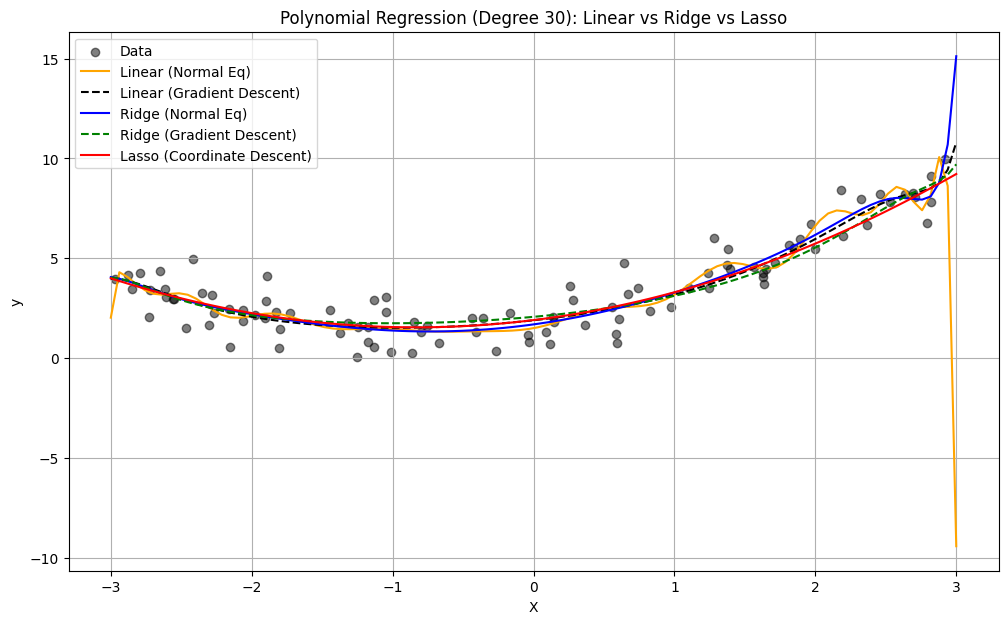

Lasso: 3 non-zero coefficients out of 31


In [6]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Create data for plotting predictions
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)

# Polynomial features (degree 30)
degree = 30
def create_polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X**d))
    return X_poly

X_poly = create_polynomial_features(X, degree)
X_new_poly = create_polynomial_features(X_new, degree)

# Standardize features (excluding bias term)
X_poly_scaled = X_poly.copy()
X_new_poly_scaled = X_new_poly.copy()
mean = np.mean(X_poly[:, 1:], axis=0)
std = np.std(X_poly[:, 1:], axis=0)
X_poly_scaled[:, 1:] = (X_poly[:, 1:] - mean) / std
X_new_poly_scaled[:, 1:] = (X_new_poly[:, 1:] - mean) / std

# Linear Regression (No Regularization) - Normal Equation
def linear_normal_equation(X, y):
    try:
        theta = solve(X.T @ X, X.T @ y, assume_a='pos')
    except np.linalg.LinAlgError:
        # Use pseudo-inverse for ill-conditioned matrices
        theta = np.linalg.pinv(X.T @ X) @ (X.T @ y)
    return theta

# Linear Regression (No Regularization) - Gradient Descent
def linear_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    theta = np.zeros((n_features, 1))
    for _ in range(n_iterations):
        y_pred = X @ theta
        gradient = (1/n_samples) * X.T @ (y_pred - y)
        theta -= learning_rate * gradient
    return theta

# L2 Regularization (Ridge) - Normal Equation
def ridge_normal_equation(X, y, lambda_reg):
    n_features = X.shape[1]
    I = np.eye(n_features)
    I[0, 0] = 0  # Do not regularize bias term
    theta = solve(X.T @ X + lambda_reg * I, X.T @ y, assume_a='pos')
    return theta

# L2 Regularization (Ridge) - Gradient Descent
def ridge_gradient_descent(X, y, lambda_reg, learning_rate=0.01, n_iterations=1000):
    n_samples, n_features = X.shape
    theta = np.zeros((n_features, 1))
    for _ in range(n_iterations):
        y_pred = X @ theta
        gradient = (1/n_samples) * X.T @ (y_pred - y) + lambda_reg * np.vstack([0, theta[1:]])
        theta -= learning_rate * gradient
    return theta

# L1 Regularization (Lasso) - Coordinate Descent
def lasso_coordinate_descent(X, y, lambda_reg, max_iter=1000, tol=1e-4):
    n_samples, n_features = X.shape
    theta = np.zeros((n_features, 1))
    y = y.reshape(-1, 1)
    for _ in range(max_iter):
        theta_old = theta.copy()
        for j in range(n_features):
            if j == 0:  # Bias term
                Xj = X[:, j].reshape(-1, 1)
                y_pred = X @ theta
                rho = (Xj * (y - y_pred + Xj * theta[j])).sum() / n_samples
                theta[j] = rho
            else:  # Regularized terms
                Xj = X[:, j].reshape(-1, 1)
                y_pred = X @ theta
                rho = (Xj * (y - y_pred + Xj * theta[j])).sum() / n_samples
                if rho < -lambda_reg:
                    theta[j] = (rho + lambda_reg) / (Xj.T @ Xj / n_samples)
                elif rho > lambda_reg:
                    theta[j] = (rho - lambda_reg) / (Xj.T @ Xj / n_samples)
                else:
                    theta[j] = 0
        if np.linalg.norm(theta - theta_old) < tol:
            break
    return theta

# Parameters
lambda_reg = 0.1
learning_rate = 0.005  # Adjusted for high-degree polynomial
n_iterations = 2000    # Increased iterations for convergence

# Compute weights
theta_linear_ne = linear_normal_equation(X_poly_scaled, y)
theta_linear_gd = linear_gradient_descent(X_poly_scaled, y, learning_rate, n_iterations)
theta_ridge_ne = ridge_normal_equation(X_poly_scaled, y, lambda_reg)
theta_ridge_gd = ridge_gradient_descent(X_poly_scaled, y, lambda_reg, learning_rate, n_iterations)
theta_lasso_cd = lasso_coordinate_descent(X_poly_scaled, y, lambda_reg)

# Predictions
y_pred_linear_ne = X_new_poly_scaled @ theta_linear_ne
y_pred_linear_gd = X_new_poly_scaled @ theta_linear_gd
y_pred_ridge_ne = X_new_poly_scaled @ theta_ridge_ne
y_pred_ridge_gd = X_new_poly_scaled @ theta_ridge_gd
y_pred_lasso_cd = X_new_poly_scaled @ theta_lasso_cd

# Plot results
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='black', label='Data', alpha=0.5)
plt.plot(X_new, y_pred_linear_ne, color='orange', label='Linear (Normal Eq)')
plt.plot(X_new, y_pred_linear_gd, color='black', linestyle='--', label='Linear (Gradient Descent)')
plt.plot(X_new, y_pred_ridge_ne, color='blue', label='Ridge (Normal Eq)')
plt.plot(X_new, y_pred_ridge_gd, color='green', linestyle='--', label='Ridge (Gradient Descent)')
plt.plot(X_new, y_pred_lasso_cd, color='red', label='Lasso (Coordinate Descent)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 30): Linear vs Ridge vs Lasso')
plt.legend()
plt.grid(True)
plt.savefig('poly_regression_degree30_comparison.png')
plt.show()

# Print number of non-zero coefficients for Lasso
non_zero_lasso = np.sum(np.abs(theta_lasso_cd) > 1e-6)
print(f"Lasso: {non_zero_lasso} non-zero coefficients out of {theta_lasso_cd.shape[0]}")

## Gradient Descent

**Concept:** Gradient Descent is an iterative optimization algorithm that aims to find the minimum of a function by repeatedly taking steps in the direction of the negative gradient (or an approximation of it). The gradient indicates the direction of the steepest increase of the function at a given point, so moving in the opposite direction should lead towards a minimum.

**Algorithm (Simplified):**

1.  Initialize the parameter vector $\theta$ with some initial values.
2.  Repeat until convergence:
    a.  Calculate the gradient of the cost function $J(\theta)$ with respect to $\theta$: $\nabla_{\theta} J(\theta)$.
    b.  Update the parameter vector in the opposite direction of the gradient:
        $$\theta_{new} = \theta_{old} - \alpha \nabla_{\theta} J(\theta_{old})$$
        where $\alpha$ is the learning rate, a positive scalar that determines the step size.

**Types of Gradient Descent:**

* **Batch Gradient Descent:** Calculates the gradient using the entire training dataset in each iteration. This provides a stable estimate of the gradient but can be computationally expensive for large datasets.
* **Stochastic Gradient Descent (SGD):** Calculates the gradient using only one randomly selected data point in each iteration. This is much faster per iteration and can escape local minima more easily due to the noisy updates, but the convergence can be less stable.
* **Mini-Batch Gradient Descent:** Calculates the gradient using a small random subset (mini-batch) of the training data in each iteration. This is a compromise between Batch GD and SGD, offering a balance of stability and efficiency.

**Advantages of Gradient Descent:**

* **General Applicability:** Can be applied to a wide range of differentiable functions.
* **Relatively Simple to Implement:** The core idea is straightforward.
* **Scalability (especially SGD and Mini-Batch GD):** Can handle large datasets more efficiently than Batch GD.

## Coordinate Descent

**Concept:** Coordinate Descent is an optimization algorithm that minimizes a multivariate function by iteratively optimizing along one coordinate direction at a time, while keeping all other coordinates fixed. In each step, the algorithm selects one coordinate (or a block of coordinates) and finds the value that minimizes the objective function along that direction. This process is repeated until convergence.

**Algorithm (Simplified - Cyclic Coordinate Descent):**

1.  Initialize the parameter vector $\theta = (\theta_1, \theta_2, ..., \theta_p)$ with some initial values.
2.  Repeat until convergence:
    a.  For each coordinate $j$ from 1 to $p$:
        i.  Find the value $\theta_j^*$ that minimizes the cost function $J(\theta_1, ..., \theta_{j-1}, \theta_j, \theta_{j+1}, ..., \theta_p)$ with respect to $\theta_j$, while keeping all other $\theta_i$ ($i \neq j$) fixed at their current values.
        ii. Update $\theta_j = \theta_j^*$.


## Key Differences Summarized

| Feature               | Gradient Descent                                  | Coordinate Descent                                    |
| :-------------------- | :------------------------------------------------ | :---------------------------------------------------- |
| **Update Direction** | Negative gradient of all parameters simultaneously | One coordinate (or block) at a time                   |
| **Derivative Usage** | Requires the gradient of the objective function     | May or may not require derivatives (can be derivative-free) |
| **Implementation** | Generally straightforward                         | Can be simple, but the single-variable minimization step might require specific solutions |
| **Convergence** | Sensitive to learning rate, can get stuck in local minima | Can stall if level curves are misaligned with axes, convergence not always guaranteed |
| **Handling Non-Smooth** | Less direct, subgradient methods often used        | Can handle non-smooth terms more naturally (e.g., L1 norm) |
| **Efficiency** | Can be slow per iteration (Batch GD), noisy (SGD)  | Can be very efficient if 1D minimization is fast     |
| **Parallelization** | Easier to parallelize gradient computation (especially for mini-batches) | Can be challenging to parallelize efficiently due to sequential updates |
| **Example Use Cases** | Neural networks, general differentiable optimization | Lasso and other sparse models, problems with separable or easily minimized single variables |

**When to Choose Which:**

* **Gradient Descent** is often the go-to method for large-scale differentiable optimization problems, especially with the advancements in SGD and its variants (like Adam, RMSprop). It's the workhorse of deep learning.
* **Coordinate Descent** can be very effective when dealing with problems where optimizing a single variable (or a small block) is significantly easier than optimizing all variables together. It shines in problems with L1 regularization where the soft-thresholding update has a closed-form solution. It can also be beneficial when the variables are somewhat decoupled.


#### Coordinate descent with Lasso

- Remember that $\mathcal{L}_{Lasso} = \mathcal{L}_{SSE} + \alpha \sum_{i=1}^{p} |\theta_i|$ 
- For one $\theta_i$: $\mathcal{L}_{Lasso}(\theta_i) = \mathcal{L}_{SSE}(\theta_i) + \alpha |\theta_i|$
- The L1 term is not differentiable but convex: we can compute the [_subgradient_](https://towardsdatascience.com/unboxing-lasso-regularization-with-proximal-gradient-method-ista-iterative-soft-thresholding-b0797f05f8ea) 
    - Unique at points where $\mathcal{L}$ is differentiable, a range of all possible slopes [a,b] where it is not
    - For $|\theta_i|$, the subgradient $\partial_{\theta_i} |\theta_i|$ =  $\begin{cases}-1 & \theta_i<0\\ [-1,1] & \theta_i=0 \\ 1 & \theta_i>0 \\ \end{cases}$

    - Subdifferential $\partial(f+g) = \partial f + \partial g$ if $f$ and $g$ are both convex
- To find the optimum for Lasso $\theta_i^{*}$, solve

    $$\begin{aligned} \partial_{\theta_i} \mathcal{L}_{Lasso}(\theta_i) &= \partial_{\theta_i} \mathcal{L}_{SSE}(\theta_i) + \partial_{\theta_i} \alpha |\theta_i| \\ 0 &= (\theta_i - \rho_i) + \alpha \cdot \partial_{\theta_i} |\theta_i| \\ \theta_i &= \rho_i - \alpha \cdot \partial_{\theta_i} |\theta_i| \end{aligned}$$

    - In which $\rho_i$ is the part of $\partial_{\theta_i} \mathcal{L}_{SSE}(\theta_i)$ excluding $\theta_i$ (assume $z_i=1$ for now)
        - $\rho_i$ can be seen as the $\mathcal{L}_{SSE}$ 'solution': $\theta_i = \rho_i$ if $\partial_{\theta_i} \mathcal{L}_{SSE}(\theta_i) = 0$ 
  $$\partial_{\theta_i} \mathcal{L}_{SSE}(\theta_i) = \partial_{\theta_i} \sum_{n=1}^{N} (y_n-(\mathbf{\theta}\mathbf{x_n} + \theta_0))^2 = z_i \theta_i -\rho_i $$ 


- We found: $\theta_i = \rho_i - \alpha \cdot \partial_{\theta_i} |\theta_i|$
- [The Lasso solution](https://xavierbourretsicotte.github.io/lasso_derivation.html) has the form of a _soft thresholding function_ $S$

    $$\theta_i^* = S(\rho_i,\alpha) = \begin{cases} \rho_i + \alpha, & \rho_i < -\alpha \\  0, & -\alpha < \rho_i < \alpha \\ \rho_i - \alpha, & \rho_i > \alpha \\ \end{cases}$$
    
    - Small weights (all weights between $-\alpha$ and $\alpha$) become 0: sparseness!
    - If the data is not normalized, $\theta_i^* = \frac{1}{z_i}S(\rho_i,\alpha)$ with constant $z_i = \sum_{n=1}^{N} x_{ni}^2$
- Ridge solution: $\theta_i = \rho_i - \alpha \cdot \partial_{\theta_i} \theta_i^2 = \rho_i - 2\alpha \cdot \theta_i$, thus $\theta_i^* = \frac{\rho_i}{1 + 2\alpha}$


# Sparsity: Definition

A vector is said to be sparse if a large fraction of its entries is zero.

To better understand sparsity, we fit Ridge and Lasso on the UCI diabetes dataset and observe the magnitude of each weight (colored lines) as a function of the regularization parameter.


The Lasso parameters become progressively smaller, until they reach exactly zero, and then they stay at zero.

Below, we are going to visualize the parameters $\theta^*$ of Ridge and Lasso as a function of $\lambda$.

(np.float64(-132.97651405931222),
 np.float64(3672.998881621872),
 np.float64(-869.348105458003),
 np.float64(828.446166462718))

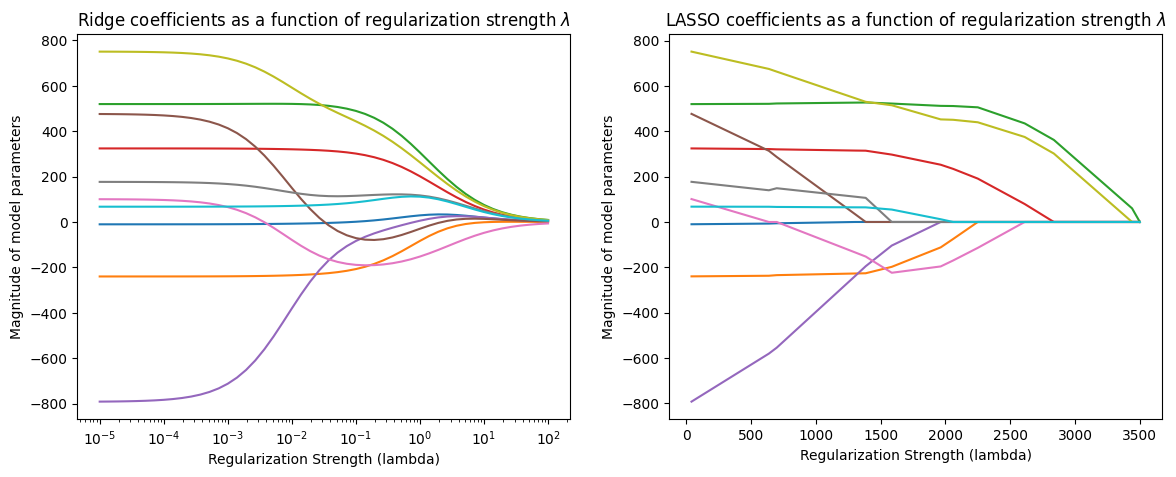

In [7]:
# Based on: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_diabetes
from sklearn.linear_model import lars_path

from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt

X, y = load_diabetes(return_X_y=True)

# create ridge coefficients
alphas = np.logspace(-5, 2,  )
ridge_coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

# create lasso coefficients
X, y = load_diabetes(return_X_y=True)
_, _, lasso_coefs = lars_path(X, y, method='lasso')
xx = np.sum(np.abs(lasso_coefs.T), axis=1)

# plot ridge coefficients
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Regularization Strength (lambda)')
plt.ylabel('Magnitude of model parameters')
plt.title('Ridge coefficients as a function of regularization strength $\lambda$')
plt.axis('tight')

# plot lasso coefficients
plt.subplot(1, 2, 2)
plt.plot(3500-xx, lasso_coefs.T)
ymin, ymax = plt.ylim()
plt.ylabel('Magnitude of model parameters')
plt.xlabel('Regularization Strength (lambda)')
plt.title('LASSO coefficients as a function of regularization strength $\lambda$')
plt.axis('tight')

- As λ increases, Ridge shrinks all coefficients smoothly toward zero.
- As Lasso regularization increases (moving left on the x-axis), more coefficients go to exactly zero.


- In 2D (for 2 model weights $\theta_1$ and $\theta_2$)
    - The least squared loss is a 2D convex function in this space (ellipses on the right)
    - For illustration, assume that L1 loss = L2 loss = 1
        - L1 loss ($\Sigma |\theta_i|$): the optimal {$\theta_1, \theta_2$} (blue dot) falls on the diamond
        - L2 loss ($\Sigma \theta_i^2$): the optimal {$\theta_1, \theta_2$} (cyan dot) falls on the circle
    - For L1, the loss is minimized if $\theta_1$ or $\theta_2$ is 0 (rarely so for L2)

### Elastic-Net

* Adds both L1 and L2 regularization:

$$\mathcal{L}_{Elastic} = \sum_{n=1}^{N} (y_n-(\mathbf{\theta}\mathbf{x_n} + \theta_0))^2 + \alpha \rho \sum_{i=1}^{p} |\theta_i| + \alpha (1 -  \rho) \sum_{i=1}^{p} \theta_i^2$$ 

* $\rho$ is the L1 ratio
    * With $\rho=1$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Lasso}$
    * With $\rho=0$, $\mathcal{L}_{Elastic} = \mathcal{L}_{Ridge}$
    * $0 < \rho < 1$ sets a trade-off between L1 and L2.
* Allows learning sparse models (like Lasso) while maintaining L2 regularization benefits
    * E.g. if 2 features are correlated, Lasso likely picks one randomly, Elastic-Net keeps both 
* Weights can be optimized using coordinate descent (similar to Lasso)

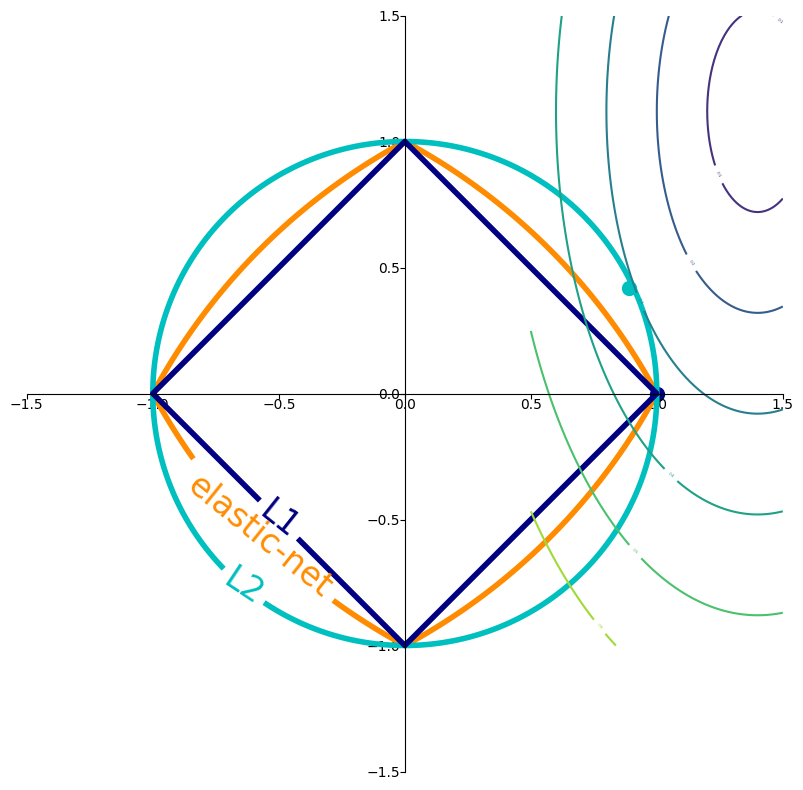

In [8]:
fig_scale = 2

def plot_loss_interpretation():
    line = np.linspace(-1.5, 1.5, 1001)
    xx, yy = np.meshgrid(line, line)

    l2 = xx ** 2 + yy ** 2
    l1 = np.abs(xx) + np.abs(yy)
    rho = 0.7
    elastic_net = rho * l1 + (1 - rho) * l2

    plt.figure(figsize=(5*fig_scale, 4*fig_scale))
    ax = plt.gca()

    elastic_net_contour = plt.contour(xx, yy, elastic_net, levels=[1], linewidths=2*fig_scale, colors="darkorange")
    l2_contour = plt.contour(xx, yy, l2, levels=[1], linewidths=2*fig_scale, colors="c")
    l1_contour = plt.contour(xx, yy, l1, levels=[1], linewidths=2*fig_scale, colors="navy")
    ax.set_aspect("equal")
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')

    plt.clabel(elastic_net_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'elastic-net'}, manual=[(-0.6, -0.6)])
    plt.clabel(l2_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'L2'}, manual=[(-0.5, -0.5)])
    plt.clabel(l1_contour, inline=1, fontsize=12*fig_scale,
               fmt={1.0: 'L1'}, manual=[(-0.5, -0.5)])

    x1 = np.linspace(0.5, 1.5, 100)
    x2 = np.linspace(-1.0, 1.5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = np.sqrt(np.square(X1/2-0.7) + np.square(X2/4-0.28))
    cp = plt.contour(X1, X2, Y)
    plt.clabel(cp, inline=1, fontsize=3)
    ax.tick_params(axis='both', pad=0)
    ax.scatter(1, 0, c="navy", s=50*fig_scale)
    ax.scatter(0.89, 0.42, c="c", s=50*fig_scale)

    plt.tight_layout()
    plt.show()
plot_loss_interpretation()

Imagine you're trying to find the lowest point in a valley (this is like minimizing the loss function).

* **No Regularization:** You are free to roam anywhere in the valley to find the absolute lowest point.

* **L2 Regularization (the circle):** Now, imagine there's a rule that says the total "distance squared" you can move from your starting point (which we can consider the origin in the parameter space) is limited. This limit is represented by the inside of the circle. You still want to get to the lowest point in the valley, but you can't go beyond the boundary of the circle. The optimal point you reach will be the lowest point *within* or *on* the boundary of the circle. It's a compromise between minimizing the loss and staying "close" to the origin in terms of the L2 norm.

* **L1 Regularization (the diamond):** Now, the rule is different. The total "Manhattan distance" you can move from your starting point is limited, represented by the inside of the diamond. Again, you want to find the lowest point in the valley, but you're restricted to the diamond shape. The lowest point you can reach within or on the boundary of the diamond might be at one of its corners, which corresponds to some of your model parameters becoming exactly zero.

* **Elastic Net (the blended shape):** This is like having a combined rule, a mix of the "distance squared" and the "Manhattan distance" being limited. The allowed region is the area inside the blended shape.

**Key takeaway:**

* The **loss function** (represented by the color-filled contours in the plot) is what we are trying to minimize. The goal of training is to find the parameter values that result in the lowest possible value of this loss function.
* **Regularization** (L1, L2, Elastic Net) adds a penalty to the loss function based on the magnitude of the model's parameters. This penalty creates a *constraint* on the parameter values. We want to minimize the *total* objective, which includes both the original loss and the regularization penalty.
* The contours of L1, L2, and Elastic Net (the diamond, circle, and blended shape) visualize the *boundary* of this regularization constraint for a fixed penalty strength (in this plot, the level is set to 1 for illustration). The optimal parameter values are often found where the loss function's contours meet or are tangent to these constraint boundaries.


## Regularizing via Constraints

Consider a regularized problem with a penalty term:
$$ \min_{\theta \in \Theta} L(\theta) + \lambda \cdot R(\theta). $$

Alternatively, we may enforce an explicit constraint on the complexity of the model:
\begin{align*}
\min_{\theta \in \Theta} \; & L(\theta) \\
\text{such that } \; & R(\theta) \leq \lambda'
\end{align*}

## Cross-Validation & Model Selection
	•	Use k-fold cross-validation to estimate model performance.
	•	Split data into training and validation sets multiple times.

## 🧪 Understanding Cross-Validation with Ridge and Lasso

We want to evaluate how well our model generalizes to unseen data. A common method is **$k$-fold cross-validation**:

- Split the dataset into $k$ parts (folds).
- Train the model on $k-1$ folds and test on the remaining one.
- Repeat this process $k$ times, each time using a different fold as the test set.
- Compute the **average validation score**.

This gives a **reliable estimate** of model performance.

### 💡 Regularization and Cross-Validation

We test multiple values of the regularization parameter $\\alpha$ for both **Ridge** and **Lasso** regressions:

- **Ridge regression** minimizes:
  $$
  \min_{\theta} \|X\theta - y\|^2_2 + \alpha \|\theta\|^2_2
  $$
- **Lasso regression** minimizes:
  $$
  \min_{\theta} \|X\theta - y\|^2_2 + \alpha \|\theta\|_1
  $$

We use 5-fold cross-validation to compute average scores for each $\\alpha$, and plot them.

### 📈 Plot Meaning

- **X-axis**: $\\alpha$ values (log-scaled).
- **Y-axis**: Cross-validation score (higher is better).
- We compare Ridge and Lasso to see which performs better on the dataset.

The best $\\alpha$ is the one that **maximizes** the cross-validation score.


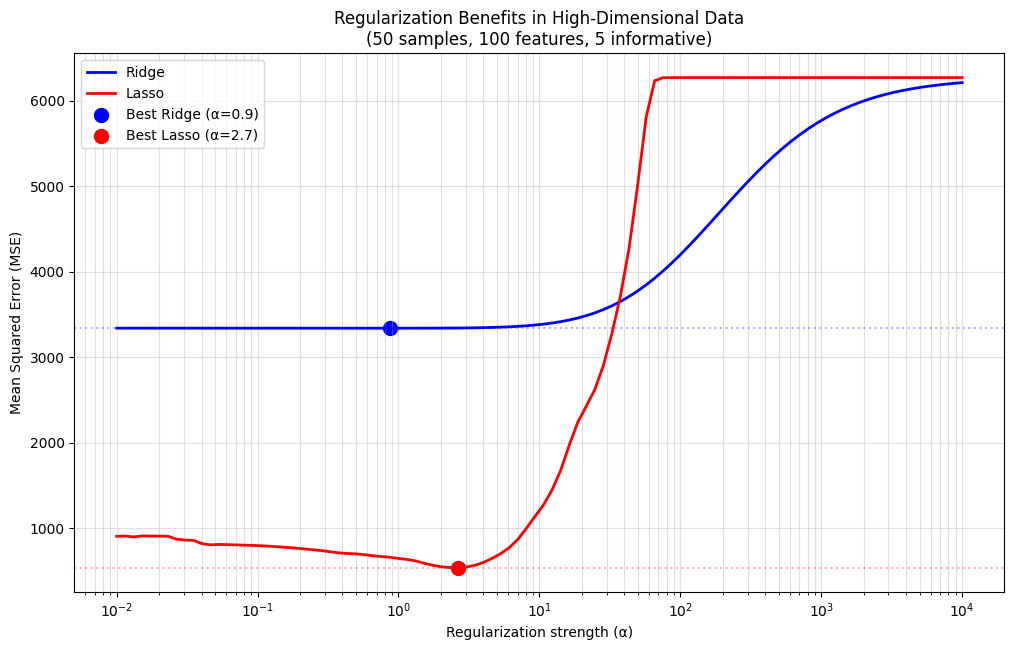

OLS (α≈0) MSE: 3338.7
Optimal Ridge MSE: 3338.2 (Improvement: 0.0%)
Optimal Lasso MSE: 539.3 (Improvement: 40.4%)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Generate challenging data - corrected version
X, y = make_regression(n_samples=50, n_features=100, 
                      n_informative=5, noise=20,
                      random_state=42)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define alpha values
alphas = np.logspace(-2, 4, 100)

# Store MSE values
ridge_mse = []
lasso_mse = []

for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha=alpha, max_iter=10000)
    ridge_mse.append(np.mean(-cross_val_score(ridge, X_scaled, y, cv=5, 
                       scoring='neg_mean_squared_error')))
    
    # Lasso regression
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso_mse.append(np.mean(-cross_val_score(lasso, X_scaled, y, cv=5, 
                       scoring='neg_mean_squared_error')))

# Find optimal alphas
optimal_ridge = alphas[np.argmin(ridge_mse)]
optimal_lasso = alphas[np.argmin(lasso_mse)]

# Plotting
plt.figure(figsize=(12, 7))
plt.semilogx(alphas, ridge_mse, label='Ridge', color='blue', linewidth=2)
plt.semilogx(alphas, lasso_mse, label='Lasso', color='red', linewidth=2)

# Highlight minima
plt.scatter(optimal_ridge, min(ridge_mse), color='blue', s=100, 
           label=f'Best Ridge (α={optimal_ridge:.1f})')
plt.scatter(optimal_lasso, min(lasso_mse), color='red', s=100,
           label=f'Best Lasso (α={optimal_lasso:.1f})')

# Add reference lines
plt.axhline(min(ridge_mse), color='blue', linestyle=':', alpha=0.3)
plt.axhline(min(lasso_mse), color='red', linestyle=':', alpha=0.3)

plt.title('Regularization Benefits in High-Dimensional Data\n(50 samples, 100 features, 5 informative)')
plt.xlabel('Regularization strength (α)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True, which='both', alpha=0.4)
plt.show()

# Print comparison
print(f"OLS (α≈0) MSE: {ridge_mse[0]:.1f}")
print(f"Optimal Ridge MSE: {min(ridge_mse):.1f} (Improvement: {100*(ridge_mse[0]-min(ridge_mse))/ridge_mse[0]:.1f}%)")
print(f"Optimal Lasso MSE: {min(lasso_mse):.1f} (Improvement: {100*(lasso_mse[0]-min(lasso_mse))/lasso_mse[0]:.1f}%)")